In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier

import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
DATA_PATH = "/content/Fertilizer Prediction.csv"

In [6]:
data = pd.read_csv(DATA_PATH)
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [8]:
data.shape

(99, 9)

In [9]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [10]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [11]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

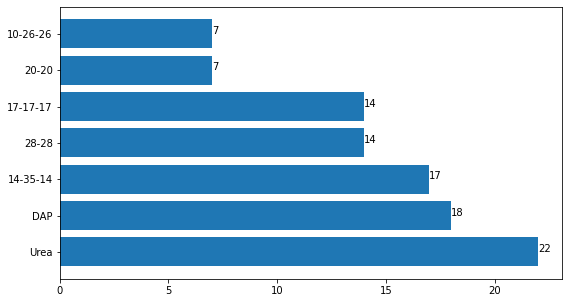

In [12]:
labels = data["Fertilizer Name"].unique()
counts = list(data["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

In [13]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

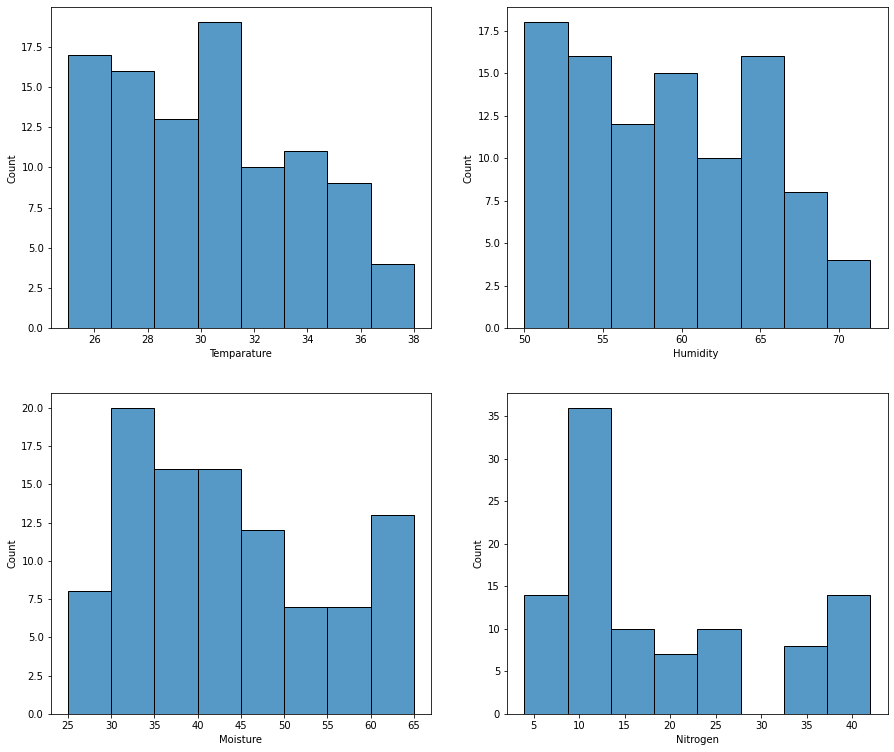

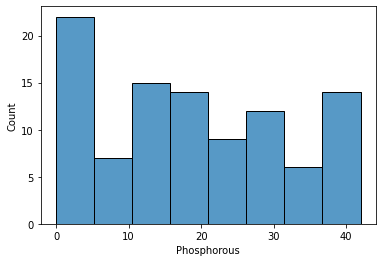

In [14]:
plt.figure(figsize=(15,13))
i = 1
for column in continuous_data_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[continuous_data_cols[-1]])
plt.show()